## Importation Librairies

.Installation

In [53]:
#pip install sqldf

In [54]:
#pip install xlrd

In [326]:
import pandas as pd
import numpy as np
import sqldf
from decimal import *
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.impute import KNNImputer
from sklearn.impute import SimpleImputer
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier 
from sklearn import metrics

## # Create a dummy pd.Dataframe

In [75]:
df = pd.read_excel('data/ONLINE_RETAILS.xlsx')

In [76]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


## Preprocessing

In [77]:
data = df.copy()

In [78]:
data.shape

(541909, 8)

In [79]:
data.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [80]:
imputer =SimpleImputer(missing_values = np.nan, strategy= 'most_frequent')
imputer.fit_transform(data)

array([[536365, '85123A', 'WHITE HANGING HEART T-LIGHT HOLDER', ...,
        2.55, 17850.0, 'United Kingdom'],
       [536365, 71053, 'WHITE METAL LANTERN', ..., 3.39, 17850.0,
        'United Kingdom'],
       [536365, '84406B', 'CREAM CUPID HEARTS COAT HANGER', ..., 2.75,
        17850.0, 'United Kingdom'],
       ...,
       [581587, 23254, 'CHILDRENS CUTLERY DOLLY GIRL ', ..., 4.15,
        12680.0, 'France'],
       [581587, 23255, 'CHILDRENS CUTLERY CIRCUS PARADE', ..., 4.15,
        12680.0, 'France'],
       [581587, 22138, 'BAKING SET 9 PIECE RETROSPOT ', ..., 4.95,
        12680.0, 'France']], dtype=object)

In [81]:
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [ ]:
data.isnull

<bound method DataFrame.isnull of        InvoiceNo StockCode                          Description  Quantity  \
0         536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1         536365     71053                  WHITE METAL LANTERN         6   
2         536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3         536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4         536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   
...          ...       ...                                  ...       ...   
541904    581587     22613          PACK OF 20 SPACEBOY NAPKINS        12   
541905    581587     22899         CHILDREN'S APRON DOLLY GIRL          6   
541906    581587     23254        CHILDRENS CUTLERY DOLLY GIRL          4   
541907    581587     23255      CHILDRENS CUTLERY CIRCUS PARADE         4   
541908    581587     22138        BAKING SET 9 PIECE RETROSPOT          3   

               InvoiceDate  UnitPrice  Cu

In [82]:
SimpleImputer(missing_values = '#valeur negative', strategy= 'most_frequent')

SimpleImputer(missing_values='#valeur negative', strategy='most_frequent')

In [59]:
imputer_2 = SimpleImputer(missing_values = '#valeur negative', strategy= 'most_frequent')
#imputer_2.fit_transform(data)

In [84]:
data.shape

(541909, 8)

In [66]:
data.head(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,2010-12-01 08:26:00,7.65,17850.0,United Kingdom
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,2010-12-01 08:26:00,4.25,17850.0,United Kingdom
7,536366,22633,HAND WARMER UNION JACK,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom
8,536366,22632,HAND WARMER RED POLKA DOT,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom
9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,2010-12-01 08:34:00,1.69,13047.0,United Kingdom


<AxesSubplot:>

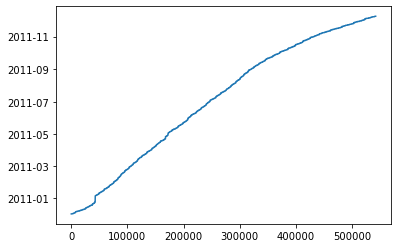

In [91]:
data['InvoiceDate'].plot()

## Nettoyage de données
- On constate la présence des valeurs négatives 
- Nous allons donc nous focaliser que sur les valeurs positives

In [177]:
neg_values = data[data['Quantity']<0].head()
neg_values

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
141,C536379,D,Discount,-1,2010-12-01 09:41:00,27.50,14527.0,United Kingdom
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,2010-12-01 09:49:00,4.65,15311.0,United Kingdom
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,2010-12-01 10:24:00,1.65,17548.0,United Kingdom
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom


In [171]:
df_clean = data[data['Quantity']>0]

In [242]:
data_f = df_clean.copy()
data_f.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


## Création d'une colonne dépense =  Prix * Quantité ==> quantité par dépenses
- Calculer la sum des quantités groupées par pays 
- calculer la moyenne pour avoir le nombre moyen par pays 

In [243]:
data_f['Splent'] = data_f.Quantity * data_f.UnitPrice
data_f.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Splent
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34


## Question 1 : VOLUME

In [244]:
data_f.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Splent
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34


Process : 

Données utilisées 
- Country ==> Pays où l’achat a été réalisé
- Quantity ===> Quantité de produits 
- CustomerID ==> Identifiant de l’acheteur

In [268]:
# Volume ici correspond au nombre de produits qu'un client achète
Volume= data_f.groupby(['CustomerID']).agg({'Quantity':'sum'}).reset_index()
Volume.head()

,CustomerID,Quantity
0,12346.0,74215
1,12347.0,2458
2,12348.0,2341
3,12349.0,631
4,12350.0,197


In [322]:
# En général un client achète :
Nb_quantite = Volume.Quantity.mean().__round__(2)
Nb_quantite
print("En général un client achète " + str(Volume.Quantity.mean().__round__(2)) + " de Produits")

En général un client achète 1194.21 de Produits


Le volume moyen et median par pays

In [247]:
Moyenne= data_f.groupby(['Country']).agg({'Quantity':'mean'}).reset_index()

In [248]:
Moyenne = Moyenne.rename(columns={'Quantity' :'Quantity Number by Country'})

In [250]:
Moyenne.head()

,Country,Quantity Number by Country
0,Australia,71.062447
1,Austria,12.263819
2,Bahrain,17.444444
3,Belgium,11.441162
4,Brazil,11.125000


In [262]:
Mediane= data_f.groupby(['Country']).agg({'Quantity':'median'}).reset_index()

In [263]:
Mediane = Mediane.rename(columns={'Quantity' :'Quantity Numb/Country'})

In [264]:
Mediane.head()

,Country,Quantity Numb/Country
0,Australia,32
1,Austria,10
2,Bahrain,6
3,Belgium,10
4,Brazil,10


## Question  2: MONTANT

Process : 

Données utilisées 
- Quantity : Quantité de produits achetés
- UnitPrice : Prix unitaire du produit
- CustomerID ==> Identifiant de l’acheteur

In [327]:
data_f.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Splent
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34


In [307]:
# Montant correspond au montant dépensé par un client généralement
Montant = data_f.groupby(['CustomerID']).agg({'StockCode':'count'}).reset_index()

In [308]:
Montant

,CustomerID,StockCode
0,12346.0,1
1,12347.0,182
2,12348.0,31
3,12349.0,73
4,12350.0,17
...,...,...
4334,18280.0,10
4335,18281.0,7
4336,18282.0,12
4337,18283.0,756


In [309]:
Montant = Montant.mean()

In [323]:
Montant.StockCode.round(2)
print("En général un client dépense un montant de " + str(Montant.StockCode.__round__(2)))

En général un client dépense un montant de 91.71


In [315]:
#np.mean(Montant.StockCode).round(2)

91.71

 Affichage la distribution associée

Le Montant moyen et median par pays

In [ ]:
## Travail à faire :
#  Calculer le montant moyen et le montant médian d’un panier client, par pays

Montant = data_df.groupby([])